# ECG dataset  

### Description 

An electrocardiogram (ECG) is a simple test that can be used to check your heart's rhythm and electrical activity. Sensors attached to the skin are used to detect the electrical signals produced by the heart each time it beats.

### Introduction

Cardiovascular diseases are one of the leading causes of death worldwide. An ECG is the most representative and important non-invasive tool for diagnosing cardiac abnormalities.At every beat, the heart is depolarized to trigger its contraction. This electrical activity is transmitted throughout the body and can be picked up on the skin. An ECG machine records this activity via electrodes on the skin and displays it graphically.

An ECG is a graph of voltage with respect to time that reflects the electrical activities of cardiac muscle depolarization followed by repolarization during each heartbeat. The ECG graph of a normal beat consists of a sequence of waves, a P-wave representing the atrial depolarization process, a QRS complex denoting the ventricular depolarization process, and a T-wave representing the ventricular repolarization. Other portions of the signal include the PR, ST, and QT intervals. 

Commonly, 10 electrodes attached to the body are used to form 12 ECG leads, with each lead measuring a specific electrical potential difference. Electrodes combinations can measure the electrical potential difference between two corresponding locations of attachment. Such a pair forms a lead. The different leads are regularly divided into limb; augmented limb; and precordial or chest leads. The 12-lead ECG has a total of three limb leads (I, II, II) and three augmented limb leads (aVR, aVL, aVF) corresponding to a coronal plane (vertical), and six precordial leads or chest leads (V1-V6) that lie on the perpendicular transverse plane (horizontal).

A resting 12-lead ECG is recorded at each visit for participants. The record length is 10 seconds and the sample rate is 1000Hz. We collect both the raw waveform ECG signal from all leads and tabular data. The tabular data are features which have been extracted automatically by the machine from the raw data such as the P wave duration.

### Measurement protocol 
<!-- long measurment protocol for the data browser -->
A 10 second resting electrocardiogram (ECG) using a 12 Lead Norav ECG machine is done for each participant. The equipment used includes an electrode belt, limb crocodile clips, a 12 Lead Norav ECG machine, and a device cart and computer. 

The device settings include a sample rate of 1000Hz, a minimum test time of 10 seconds, and various filters such as an AC noise filter, EMG filter, and a baseline filter. The protocol involves turning on the computer and entering the "resting ECG" software, verifying the participant's identity, and attaching the electrode belt and limb crocodile clips to the participant's chest. The figure below shows the software system used to record the ECG.

The participant is instructed to take normal deep breaths and to remain still during the 10 second recording. The ECG is then interpreted and, if necessary, the test can be repeated.

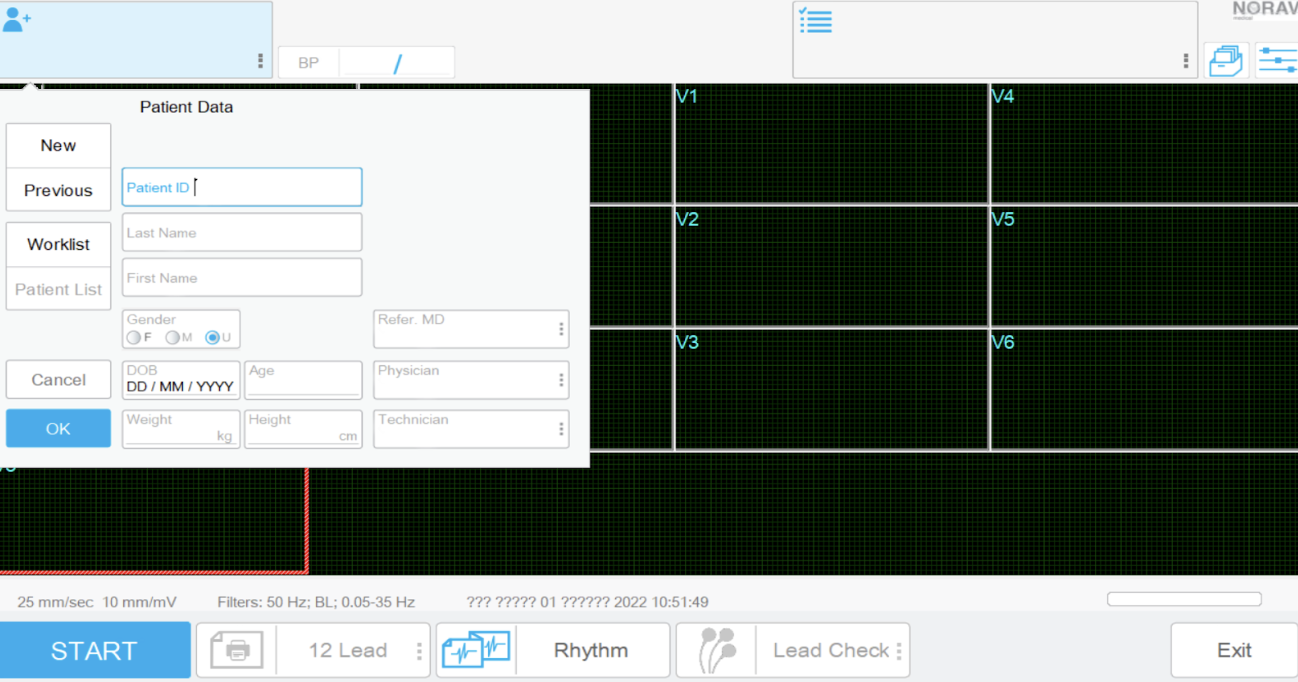

### Data availability 
<!-- for the example notebooks -->
The information is stored in 2 tabular parquet files: `ecg.parquet`, `ecg_qc.parquet`, which contain tabular features and QC checks on the raw ECG waveform data. Mutiple time series parquet files contain the raw and processed ECG waveform data

### Relevant links

* Pheno Knowledgebase: https://knowledgebase.pheno.ai/datasets/015-ecg.html
* Pheno Data Browser: https://pheno-demo-app.vercel.app/folder/15

In [1]:
#| echo: false
import pandas as pd
pd.set_option("display.max_rows", 500)

In [2]:
from pheno_utils import PhenoLoader

In [3]:
pl = PhenoLoader('ecg')
pl

PhenoLoader for ecg with
165 fields
3 tables: ['ecg', 'ecg_qc', 'age_sex']

# Data dictionary

In [4]:
pl.dict

,field_string,description_string,folder_id,feature_set,field_type,strata,data_coding,array,pandas_dtype,bulk_file_extension,...,list_of_tags,stability,sexed,debut,completed,min_plausible_value,max_plausible_value,dependency,customer_field,parent_dataframe
tabular_field_name,,,,,,,,,,,,,,,,,,,,,
collection_date,Collection date (YYYY-MM-DD),Collection date (YYYY-MM-DD),15.0,ecg,Date,Collection time,NaN,Single,datetime64[ns],NaN,...,ECG at rest,Accruing,Both sexes,2019-08-13,NaN,NaN,NaN,NaN,NaN,NaN
timezone,Timezone,Timezone for timestamp columns,15.0,ecg,Text,Collection time,NaN,Single,string,NaN,...,ECG at rest,Accruing,Both sexes,2019-08-13,NaN,NaN,NaN,NaN,NaN,NaN
collection_timestamp,Collection timestamp,Collection timestamp,15.0,ecg,Datetime,Collection time,NaN,Single,"datetime64[ns, Asia/Jerusalem]",NaN,...,ECG at rest,Accruing,Both sexes,2019-08-13,NaN,NaN,NaN,NaN,NaN,NaN
raw_ecg_time_series,Raw ECG times series file path,S3 reference to raw ECG time series,15.0,raw_timeseries_long,Bulk file (individual),Auxiliary,NaN,Single,string,parquet,...,ECG at rest,Accruing,Both sexes,2019-08-13,NaN,NaN,NaN,NaN,NaN,NaN
processed_ecg_time_series,Processed ECG times series file path,S3 reference to processed ECG time series,15.0,processed_timeseries_long,Bulk file (individual),Auxiliary,NaN,Single,string,parquet,...,ECG at rest,Accruing,Both sexes,2019-08-13,NaN,NaN,NaN,NaN,NaN,NaN
raw_ecg_time_series_wide,Raw ECG times series (wide format) file path,S3 reference to raw ECG time series wide format,15.0,raw_timeseries_wide,Bulk file (individual),Auxiliary,NaN,Single,string,parquet,...,ECG at rest,Accruing,Both sexes,2019-08-13,NaN,NaN,NaN,NaN,NaN,NaN
processed_ecg_time_series_wide,Processed ECG times series (wide format) file ...,S3 reference to processed ECG time series wide...,15.0,processed_timeseries_wide,Bulk file (individual),Auxiliary,NaN,Single,string,parquet,...,ECG at rest,Accruing,Both sexes,2019-08-13,NaN,NaN,NaN,NaN,NaN,NaN
hr_bpm,Heart rate,Heart rate,15.0,ecg,Integer,Primary,NaN,Single,float,NaN,...,ECG at rest,Accruing,Both sexes,2019-08-13,NaN,NaN,NaN,NaN,NaN,NaN
p_ms,P wave duration,P wave duration,15.0,ecg,Integer,Primary,NaN,Single,float,NaN,...,ECG at rest,Accruing,Both sexes,2019-08-13,NaN,NaN,NaN,NaN,NaN,NaN


# Plot histogram and ecdf for p_ms at baseline visit


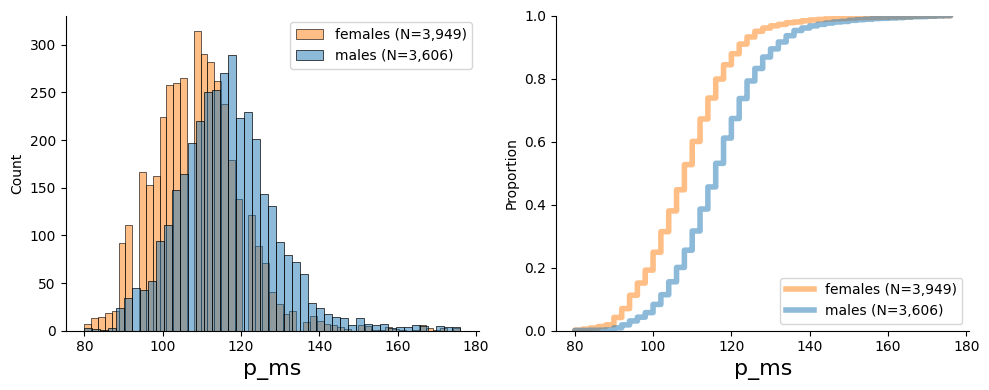

,count,mean,std,min,25%,50%,75%,max
p_ms,7555.0,112.610721,12.721296,80.0,104.0,112.0,120.0,176.0


In [5]:
from pheno_utils.basic_plots import hist_ecdf_plots

col = "p_ms"
df = pl[[col] + ["age", "sex", "collection_date"]].loc[:,:,"00_00_visit",0,:]

# plot histogram and ecdf
hist_ecdf_plots(df.dropna(subset=[col,"sex", "age"]), col, gender_col="sex")

# stats
display(df[col].describe().to_frame().T)